In [17]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer


In [18]:
# Read the reviews from the "amazon_review.txt" file
with open('amazon_review.txt', 'r', encoding='utf-8') as file:
    review_lines = file.read().split('"\n"')

In [19]:

# Download the VADER lexicon 
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\India\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [20]:
# Initialize the VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

In [21]:
# Initialize variables to store the reviews and sentiments
reviews = []
sentiments = []

In [22]:
# Analyze each review and determine sentiment
for review in review_lines:
    review = review.strip('"')  # Remove double quotes
    sentiment = sia.polarity_scores(review)
    if sentiment['compound'] >= 0.05:
        sentiments.append('Positive')
    elif sentiment['compound'] <= -0.05:
        sentiments.append('Negative')
    else:
        sentiments.append('Neutral')
    reviews.append(review)  # Store the cleaned review text

In [23]:
# Print the sentiments for each review
for i, sentiment in enumerate(sentiments, start=1):
    print(f"Review {i}: {sentiment}")

Review 1: Positive
Review 2: Positive
Review 3: Positive
Review 4: Positive
Review 5: Positive
Review 6: Positive
Review 7: Positive
Review 8: Positive
Review 9: Positive
Review 10: Positive
Review 11: Negative
Review 12: Negative
Review 13: Negative


In [24]:
import matplotlib.pyplot as plt

In [25]:
# Count the number of reviews for each sentiment
sentiment_counts = {
    'Positive': sentiments.count('Positive'),
    'Negative': sentiments.count('Negative'),
    'Neutral': sentiments.count('Neutral')
}


In [26]:
# Create a pie chart to visualize sentiment distribution
labels = sentiment_counts.keys()
sizes = sentiment_counts.values()
colors = ['green', 'red', 'gray']
explode = (0.1, 0, 0)  # To explode the 'Positive' slice

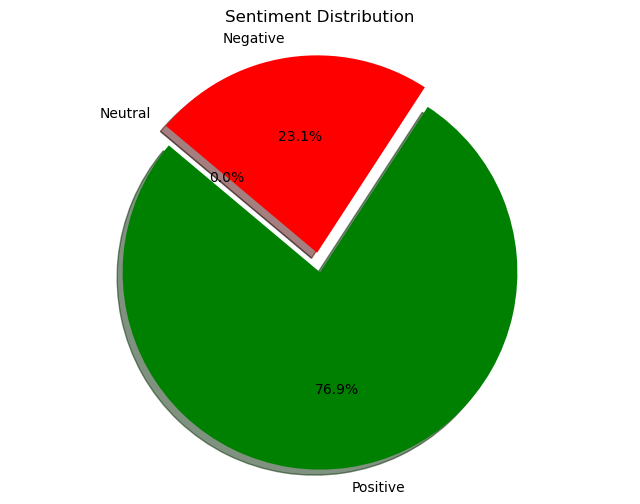

In [27]:
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Sentiment Distribution')
plt.show()

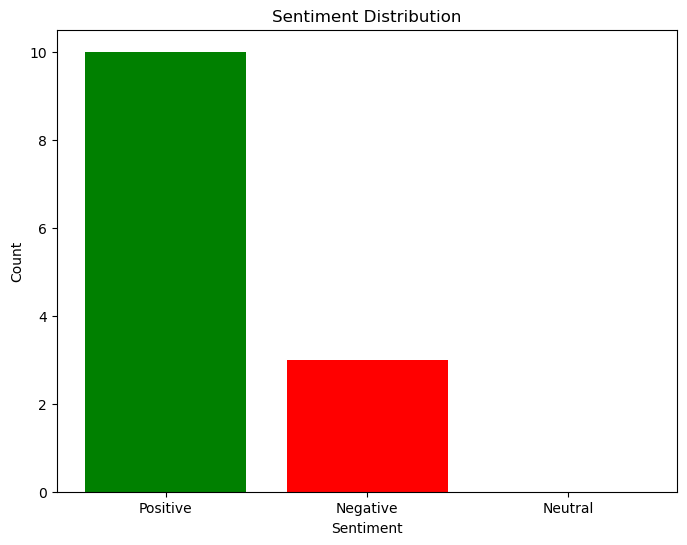

In [28]:
# Create a bar plot to visualize sentiment distribution
labels = sentiment_counts.keys()
sizes = sentiment_counts.values()
colors = ['green', 'red', 'gray']
explode = (0.1, 0, 0)  # To explode the 'Positive' slice

plt.figure(figsize=(8, 6))
plt.bar(labels, sizes, color=colors)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution')
plt.show()

In [29]:
## Text preprocessing

In [30]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [31]:
# Sample review text (replace with your actual review data)
review_text = "Camera is not upto the mark, other aspects are good"

In [32]:
# Tokenize the review text
tokens = word_tokenize(review_text)

In [33]:
# Convert tokens to lowercase
tokens = [word.lower() for word in tokens]

In [34]:
# Remove stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
filtered_tokens = [word for word in tokens if word not in stop_words]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\India\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [35]:
print("Original Tokens:", tokens)
print("Processed Tokens:", filtered_tokens)

Original Tokens: ['camera', 'is', 'not', 'upto', 'the', 'mark', ',', 'other', 'aspects', 'are', 'good']
Processed Tokens: ['camera', 'upto', 'mark', ',', 'aspects', 'good']


In [44]:
#  EDA
import pandas as pd


In [45]:
# Create a DataFrame from the reviews
df = pd.DataFrame({'Review_Text': reviews})

In [46]:
# View the first few rows of the DataFrame
print(df.head())

                                         Review_Text
0  Whenever you get this phone, just install any ...
1  Camera is not upto the mark, other aspects are...
2                            Nice camera and battery
3                                    Value for money
4                              Good and value wealth


In [47]:
# Summary statistics
print(df.describe())

                                              Review_Text
count                                                  13
unique                                                 13
top     Whenever you get this phone, just install any ...
freq                                                    1


In [48]:
# Distribution of review ratings (if available)
# Example: If ratings are in the format "Rating: 5", you can extract them using regular expressions
import re
ratings = [int(re.search(r'\d+', review).group()) for review in reviews if re.search(r'\d+', review)]
if ratings:
    ratings_distribution = pd.Series(ratings).value_counts()
    print("Ratings Distribution:")
    print(ratings_distribution)

Ratings Distribution:
8    1
6    1
dtype: int64


In [49]:
# Word cloud for review text (requires installation of 'wordcloud' library)
from wordcloud import WordCloud

In [50]:
text = ' '.join(reviews)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

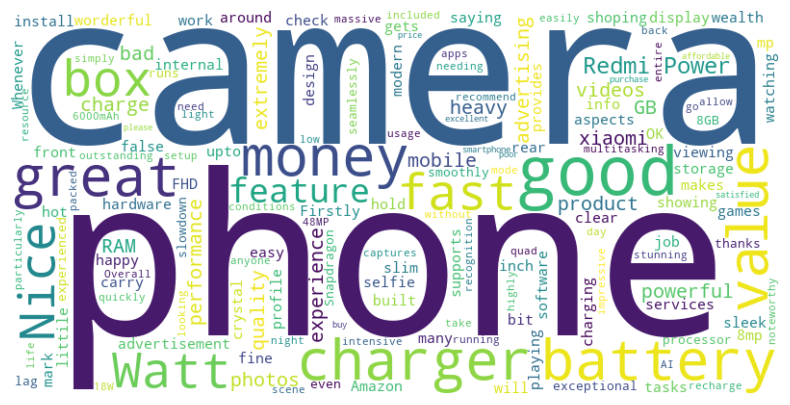

In [51]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [58]:
## Bar Plot of Most Frequent Words:
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [59]:
# Download stopwords (if not already downloaded)
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\India\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [60]:
# Tokenize and preprocess the text (assuming 'Review_Text' contains the review text)
text = ' '.join(df['Review_Text'])
tokens = word_tokenize(text.lower())

In [61]:
# Remove stopwords
filtered_tokens = [word for word in tokens if word not in stopwords.words('english')]

In [62]:
# Count the frequency of words
word_counts = Counter(filtered_tokens)

In [63]:
# Get the most common words
most_common_words = word_counts.most_common(10)

In [64]:
# Extract words and their counts for plotting
words, counts = zip(*most_common_words)

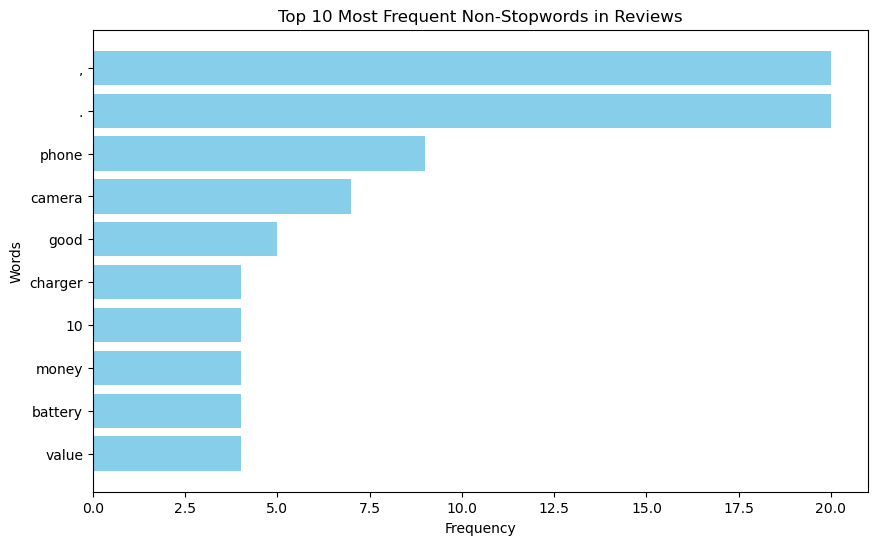

In [65]:
plt.figure(figsize=(10, 6))
plt.barh(words, counts, color='skyblue')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title('Top 10 Most Frequent Non-Stopwords in Reviews')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()